<a href="https://colab.research.google.com/github/shubhangi0301/Machine-Learning-PG/blob/main/23MCA0200_PAT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## PAT 1 - PMCA507P Machine Learning Lab

**23MCA0200**

>


**SHUBHANGI RASTOGI**

Ques 1: Write a Python program to identify the consistent hypothesis for the below tennis play dataset using the candidate elimination algorithm.

In [26]:
def candidate_el(dataset):
  specific_hypothesis = dataset[0][:-1]
  general_hypothesis = [['?' for _ in range(len(specific_hypothesis))] for _ in range(len(specific_hypothesis))]

  for item in dataset:
    if item[-1]=='Yes':
      for i in range(len(specific_hypothesis)):
        if item[i]!= specific_hypothesis[i]:
          specific_hypothesis[i]='?'
          general_hypothesis[i][i] = '?'
      else:
        for i in range(len(specific_hypothesis)):
          if item[i]!=specific_hypothesis[i]:
            general_hypothesis[i][i]=specific_hypothesis[i]
          else:
            general_hypothesis[i][i]= '?'
  return specific_hypothesis,general_hypothesis

In [27]:
dataset = [
    ['Overcast','Hot','High','False','Yes'],
    ['Rainy','Mild','High','False','Yes'],
    ['Rainy','Cool','Normal','False','Yes'],
    ['Rainy','Cool','Normal','True','No'],
    ['Overcast','Cool','Normal','True','Yes'],
    ['Sunny','Mild','High','False','No'],
    ['Sunny','Cool','Normal','False','Yes'],
    ['Rainy','Mild','Normal','False','Yes'],
    ['Overcast','Mild','Normal','True','Yes'],
    ['Rainy','Mild','High','True','No']
]

In [28]:
specific, general = candidate_el(dataset)
print("Specific Hypothesis: ", specific)
print("General Hypothesis: ")
for hyp in general:
  print(hyp)

Specific Hypothesis:  ['?', '?', '?', '?']
General Hypothesis: 
['?', '?', '?', '?']
['?', '?', '?', '?']
['?', '?', '?', '?']
['?', '?', '?', '?']


Ques 2: Develop a Multiple Linear Regression (MLR) for estimating the selling price of the car using the car_data.csv. Print the intercept, coefficients and all errors of the MLR model.



In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [30]:
dataset = pd.read_csv('car_data.csv')

In [31]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [32]:
label_encoder = LabelEncoder()

dataset['Fuel_Type'] = label_encoder.fit_transform(dataset['Fuel_Type'])
dataset['Seller_Type'] = label_encoder.fit_transform(dataset['Seller_Type'])
dataset['Transmission'] = label_encoder.fit_transform(dataset['Transmission'])
dataset['Car_Name'] = label_encoder.fit_transform(dataset['Car_Name'])

In [33]:
correlation_matrix = dataset.corr()

In [34]:
print("Correlation Matrix: ", correlation_matrix)

Correlation Matrix:                 Car_Name      Year  Selling_Price  Present_Price  Kms_Driven  \
Car_Name       1.000000  0.017265       0.499198       0.475539    0.064453   
Year           0.017265  1.000000       0.236141      -0.047584   -0.524342   
Selling_Price  0.499198  0.236141       1.000000       0.878983    0.029187   
Present_Price  0.475539 -0.047584       0.878983       1.000000    0.203647   
Kms_Driven     0.064453 -0.524342       0.029187       0.203647    1.000000   
Fuel_Type     -0.371446 -0.053643      -0.509467      -0.440415   -0.166801   
Seller_Type   -0.829718 -0.039896      -0.550724      -0.512030   -0.101419   
Transmission  -0.059855  0.000394      -0.367128      -0.348715   -0.162510   
Owner         -0.081192 -0.182104      -0.088344       0.008057    0.089216   

               Fuel_Type  Seller_Type  Transmission     Owner  
Car_Name       -0.371446    -0.829718     -0.059855 -0.081192  
Year           -0.053643    -0.039896      0.000394 -0.18210

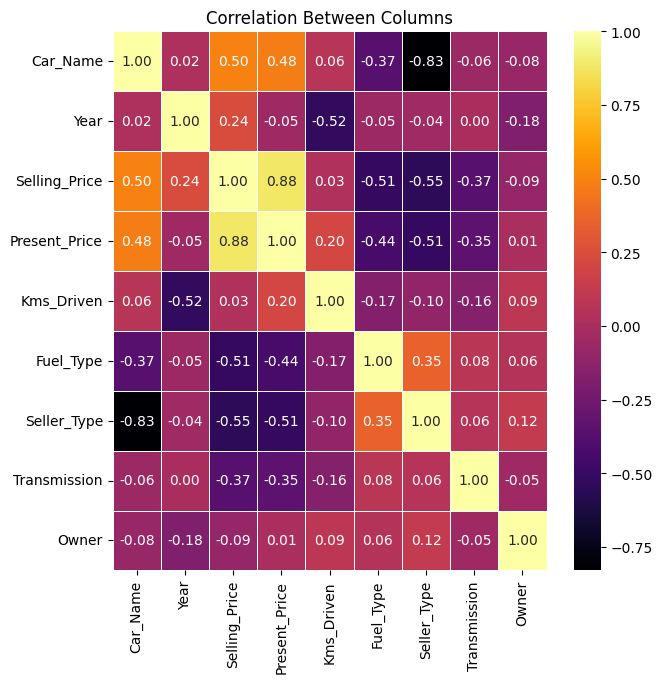

In [35]:
plt.figure(figsize=(7,7))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt=".2f", linewidths=.5)
plt.title('Correlation Between Columns')
plt.show()

In [36]:
x = dataset[['Car_Name','Year','Fuel_Type','Present_Price', 'Transmission']]
y = dataset['Selling_Price']

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=45)

In [38]:
model = LinearRegression()


In [39]:
model.fit(x_train, y_train)


LinearRegression()

In [40]:
y_pred = model.predict(x_test)

In [41]:
print('Coefficients: ',model.coef_)
print('Intercept:' ,model.intercept_)

Coefficients:  [ 0.01500248  0.50315426 -1.27978158  0.43793762 -1.6733767 ]
Intercept: -1009.0595393299287


In [42]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ',mse)

Mean Squared Error:  2.4101301279386544


In [43]:
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error: ',mae)

Mean Absolute Error:  1.2307731276448746


In [44]:
rmse = np.sqrt(mse)
print('Root Mean Squared Error: ',rmse)

Root Mean Squared Error:  1.5524593804472484
